In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

2.6.0+cu124
True
1
0
Tesla T4


##Creating Tensors


In [ ]:
a = torch.empty(2,3)

In [ ]:
type(a)

torch.Tensor

In [ ]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.rand(2,3) #creating tensor and values random between 0 to 1

tensor([[0.3756, 0.0763, 0.7036],
        [0.5782, 0.5777, 0.4765]])

In [ ]:
torch.manual_seed(100)
torch.rand(3,3)

tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539],
        [0.2627, 0.0428, 0.2080]])

In [ ]:
torch.tensor([[1,2,3],[4,5,6
]])

tensor([[1, 2, 3],
        [4, 5, 6]])

##Tensor shape

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])
x.shape

torch.Size([2, 3])

In [ ]:
torch.empty_like(x) #similarly empty_like, zeros_like, ones_like

tensor([[3616445622929465956, 6066683143785557301, 3617861858615767089],
        [6500720890701232174, 7309453675965983778, 8315168162784306286]])

##Tensor datatypes

In [ ]:
x.dtype

torch.int64

In [ ]:
torch.tensor([1.2,3.3,4,4.4],dtype = torch.float64)

tensor([1.2000, 3.3000, 4.0000, 4.4000], dtype=torch.float64)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda')

In [ ]:
torch.rand((2,3),device = device)

tensor([[0.3563, 0.0303, 0.7088],
        [0.2009, 0.0224, 0.9896]], device='cuda:0')

In [ ]:
a = torch.rand(2,3)
a

tensor([[0.9014, 0.9969, 0.7565],
        [0.2239, 0.3023, 0.1784]])

In [ ]:
b = a.to(device)
b

tensor([[0.9014, 0.9969, 0.7565],
        [0.2239, 0.3023, 0.1784]], device='cuda:0')

###Autograd - for automatic differentiation


In [ ]:
import torch

In [ ]:
x = torch.tensor(3.0,requires_grad=True)

In [ ]:
y = x**2

In [ ]:
x

tensor(3., requires_grad=True)

In [ ]:
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
 y.backward()

In [ ]:
print(x.grad)

tensor(6.)


##Pipelines
####We'll build a nerual netowrk - simple one - working on real dataset
####We'll include manual events

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns = ['id','Unnamed: 32'],inplace = True)

In [ ]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = 0.2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)

[[ 0.10595707  0.50726305  0.10145438 ...  0.13560638  0.2109928
  -0.83047585]
 [-0.79310319 -1.2375092  -0.83182805 ... -1.54946871 -0.21134709
  -1.0769145 ]
 [-0.51339556 -0.67344584 -0.52433517 ... -0.40747824 -0.43702489
  -0.42170915]
 ...
 [-0.87587382 -1.05347158 -0.87836751 ... -0.6958123   0.50437395
  -0.5942162 ]
 [-0.67322849 -0.42487555 -0.66146037 ... -0.18963928 -0.66270269
  -0.34242019]
 [ 1.55301596  2.25442539  1.73656853 ...  1.21875007 -0.11462803
   0.88602287]]


In [ ]:
#Ytrain has problem - malignant - M and Benign B are represented by letters, we have to label encode them

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
class MySimpleNN():
  def __init__(self,x):

    self.weights = torch.rand(x.shape[1],1,dtype = torch.float64,requires_grad=True)
    self.bias = torch.rand(1,dtype = torch.float64,requires_grad=True)

  def forward(self,x):
    z = torch.matmul(x,self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss(self,y_pred,y):
    epsilon = 10**(-7)
    y_pred = torch.clamp(y_pred,epsilon,1-epsilon)

    loss = -(y_train_tensor*torch.log(y_pred) + (1-y_train_tensor)*torch.log(1-y_pred)).mean()
    return loss

In [ ]:
model = MySimpleNN(x_train_tensor)
model.weights

tensor([[0.0690],
        [0.2765],
        [0.6195],
        [0.3573],
        [0.0612],
        [0.7870],
        [0.3011],
        [0.3721],
        [0.4504],
        [0.5687],
        [0.1377],
        [0.4087],
        [0.2892],
        [0.2540],
        [0.4364],
        [0.9745],
        [0.9521],
        [0.4541],
        [0.0571],
        [0.1258],
        [0.2109],
        [0.1688],
        [0.4480],
        [0.9926],
        [0.8865],
        [0.3292],
        [0.1110],
        [0.1080],
        [0.8241],
        [0.1115]], dtype=torch.float64, requires_grad=True)

In [ ]:
learning_rate = 0.7
epochs = 30

In [ ]:
model = MySimpleNN(x_train_tensor)
for epoch in range(epochs):
  y_pred = model.forward(x_train_tensor)
  loss = model.loss(y_pred,y_train_tensor)
  loss.backward()

  #telling the model to not to rrack this operation - this is just for weight updation
  with torch.no_grad():
    model.weights -= learning_rate*model.weights.grad
    model.bias -= learning_rate*model.bias.grad

  #with each iteration update start from 0 grad, last wale ki add thodi krna hai compute new and then update the weights
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.9676545219210073
Epoch: 2, Loss: 3.212280210710792
Epoch: 3, Loss: 2.2685789252232955
Epoch: 4, Loss: 1.3648447873506138
Epoch: 5, Loss: 1.0223556729479673
Epoch: 6, Loss: 0.9010993171473785
Epoch: 7, Loss: 0.8223616843877891
Epoch: 8, Loss: 0.7716761746992733
Epoch: 9, Loss: 0.7395126836944438
Epoch: 10, Loss: 0.7187461897238455
Epoch: 11, Loss: 0.7050054962222088
Epoch: 12, Loss: 0.6955870733730422
Epoch: 13, Loss: 0.6891726000592571
Epoch: 14, Loss: 0.6845369417447759
Epoch: 15, Loss: 0.6814255739207541
Epoch: 16, Loss: 0.6789557663912343
Epoch: 17, Loss: 0.6774253652572159
Epoch: 18, Loss: 0.6759388244484937
Epoch: 19, Loss: 0.6751880469817232
Epoch: 20, Loss: 0.674142918142948
Epoch: 21, Loss: 0.6737924804266683
Epoch: 22, Loss: 0.6729501817319734
Epoch: 23, Loss: 0.6728213921536462
Epoch: 24, Loss: 0.6720829056257989
Epoch: 25, Loss: 0.6720925499484135
Epoch: 26, Loss: 0.6714188091783984
Epoch: 27, Loss: 0.6715288490301932
Epoch: 28, Loss: 0.6709040661191974
Epo

In [ ]:
model.weights

tensor([[ 0.4360],
        [-0.2601],
        [-0.0168],
        [-0.4556],
        [-0.0646],
        [-0.0113],
        [-0.1080],
        [-0.2275],
        [-0.0168],
        [-0.0008],
        [-0.1151],
        [ 0.0346],
        [ 0.2869],
        [-0.2854],
        [-0.0517],
        [ 0.0595],
        [-0.2470],
        [ 0.0600],
        [ 0.0891],
        [ 0.2052],
        [-0.3268],
        [ 0.1893],
        [ 0.3285],
        [ 0.2305],
        [ 0.1824],
        [-0.1026],
        [ 0.2560],
        [-0.0637],
        [-0.0617],
        [-0.1941]], dtype=torch.float64, requires_grad=True)

In [ ]:
model.bias

tensor([-0.5271], dtype=torch.float64, requires_grad=True)

In [ ]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.6228070259094238


#Torch ka NN Module

In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.linear(features)
    out = self.sigmoid(out)

    return out


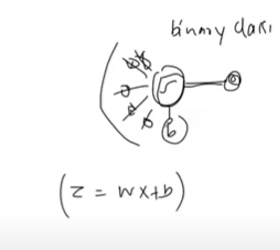

In [ ]:
features = torch.rand(10,5)

model = Model(features.shape[1])
model(features)

tensor([[0.5460],
        [0.5051],
        [0.5281],
        [0.4912],
        [0.5356],
        [0.5340],
        [0.5423],
        [0.5205],
        [0.5134],
        [0.4764]], grad_fn=<SigmoidBackward0>)

In [ ]:
features

tensor([[0.9741, 0.4158, 0.9993, 0.9885, 0.3908],
        [0.1432, 0.1166, 0.1815, 0.8376, 0.1228],
        [0.3934, 0.1798, 0.4758, 0.3116, 0.4818],
        [0.9505, 0.7073, 0.4163, 0.0323, 0.6233],
        [0.6790, 0.1540, 0.6298, 0.4539, 0.4860],
        [0.6675, 0.3865, 0.6905, 0.0790, 0.7117],
        [0.5913, 0.6564, 0.9102, 0.3315, 0.6034],
        [0.8341, 0.0673, 0.5816, 0.6833, 0.8519],
        [0.4631, 0.9941, 0.6623, 0.4109, 0.1901],
        [0.0424, 0.6736, 0.1662, 0.5342, 0.6780]])

In [ ]:
model.linear.weight

Parameter containing:
tensor([[-0.0777, -0.1718,  0.3812, -0.0720, -0.0780]], requires_grad=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([0.0524], requires_grad=True)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model ,input_size = (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

##Neural netowrk with a hidden layer

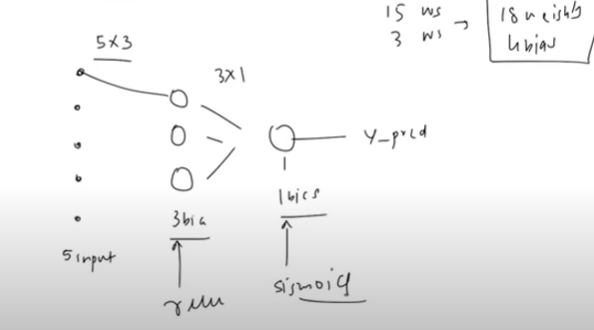

In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid(),
    )

    # self.linear1 = nn.Linear(num_features,3)
    # self.relu = nn.ReLU()
    # self.linear2 = nn.Linear(3,1)
    # self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.network(features)


    # #this below structure is quite cumbersom
    # out = self.linear1(features)
    # out = self.relu(out)
    # out = self.linear2(out)
    # out = self.sigmoid(out)

    return out

In [ ]:
model = Model(features.shape[1])
model(features)

tensor([[0.4395],
        [0.4508],
        [0.4752],
        [0.4652],
        [0.4670],
        [0.4816],
        [0.4693],
        [0.4634],
        [0.4504],
        [0.4644]], grad_fn=<SigmoidBackward0>)

In [ ]:
summary(model , input_size= (10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

##modifying the earlier hand made code


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns = ['id','Unnamed: 32'],inplace = True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = 0.2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
x_train_tensor = x_train_tensor.float()
y_train_tensor = y_train_tensor.float()
x_test_tensor = x_test_tensor.float()
y_test_tensor = y_test_tensor.float()


In [ ]:
class MySimpleNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.linear = nn.Linear(num_features,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,features):
    out = self.linear(features)
    out = self.sigmoid(out)
    return out


In [ ]:
model = MySimpleNN(x_train_tensor.shape[1])
model.linear.weight

Parameter containing:
tensor([[-0.0458,  0.0332, -0.0226,  0.1509, -0.0379,  0.1121,  0.1324, -0.1372,
         -0.0870, -0.1232, -0.0512, -0.1103, -0.0545,  0.1406, -0.0850,  0.0817,
         -0.1146, -0.1749,  0.1772, -0.0538,  0.0517, -0.0916, -0.1310, -0.0198,
         -0.0347, -0.1076,  0.1634, -0.1633, -0.1382, -0.1550]],
       requires_grad=True)

In [ ]:
learning_rate = 0.7
epochs = 30

In [ ]:
loss1 = nn.BCELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
# model = MySimpleNN(x_train_tensor)
for epoch in range(epochs):
  y_pred = model(x_train_tensor)
  loss = loss1(y_pred,y_train_tensor.view(-1,1))

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()


  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.872230589389801
Epoch: 2, Loss: 0.19203807413578033
Epoch: 3, Loss: 0.16312798857688904
Epoch: 4, Loss: 0.14614078402519226
Epoch: 5, Loss: 0.13577225804328918
Epoch: 6, Loss: 0.12841588258743286
Epoch: 7, Loss: 0.12263798713684082
Epoch: 8, Loss: 0.11786866188049316
Epoch: 9, Loss: 0.11381933093070984
Epoch: 10, Loss: 0.11031638830900192
Epoch: 11, Loss: 0.10724398493766785
Epoch: 12, Loss: 0.10451962053775787
Epoch: 13, Loss: 0.10208198428153992
Epoch: 14, Loss: 0.09988418221473694
Epoch: 15, Loss: 0.0978894755244255
Epoch: 16, Loss: 0.09606853127479553
Epoch: 17, Loss: 0.09439761936664581
Epoch: 18, Loss: 0.09285731613636017
Epoch: 19, Loss: 0.09143148362636566
Epoch: 20, Loss: 0.09010665118694305
Epoch: 21, Loss: 0.08887141942977905
Epoch: 22, Loss: 0.08771612495183945
Epoch: 23, Loss: 0.08663246780633926
Epoch: 24, Loss: 0.08561330288648605
Epoch: 25, Loss: 0.08465242385864258
Epoch: 26, Loss: 0.08374446630477905
Epoch: 27, Loss: 0.08288469165563583
Epoch: 28, Lo

In [ ]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5240073800086975


##Implrmenting dataset and dataloader


In [ ]:
from sklearn.datasets import make_classification
import torch

In [ ]:
x,y = make_classification(
    n_samples=10,
    n_features = 2,
    n_informative=2,
    n_redundant=0,
    random_state=42,
    n_classes=2,
)

In [ ]:
x

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [ ]:
x = torch.tensor(x,dtype =torch.float32)
y= torch.tensor(y,dtype =torch.long)

In [ ]:
from torch.utils.data import Dataset,DataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index], self.labels[index]

In [ ]:
dataset = CustomDataset(x,y)

In [ ]:
# print(dataset.__len__)

In [ ]:
dataloader = DataLoader(dataset, batch_size = 2,shuffle = True)

In [ ]:
for batch_features,batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)

In [ ]:
x= torch.tensor([[1,2],[1]])

In [ ]:
x

##Building ANN using pytorch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
print(device)

cuda


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


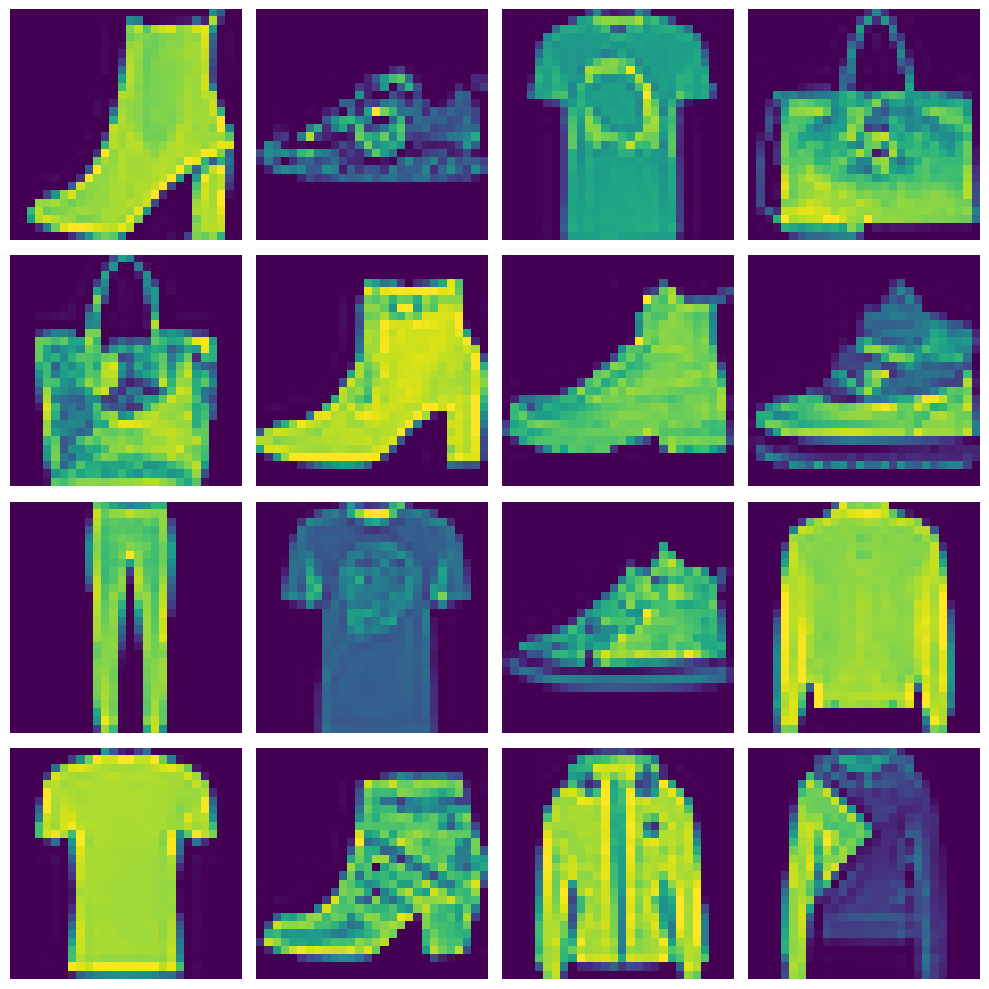

In [ ]:
fig,axes = plt.subplots(4,4,figsize=(10,10))

for i,ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")

plt.tight_layout(rect=[0,0,1,1])
plt.show()

In [ ]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
y

array([9, 7, 0, ..., 8, 4, 8])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
y_train

array([7, 6, 7, ..., 0, 8, 6])

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype = torch.float32)
    self.labels = torch.tensor(labels,dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [ ]:
train_dataset = CustomDataset(x_train,y_train)
test_dataset = CustomDataset(x_test,y_test)

In [ ]:
# for i in range(0,10):
#   print(train_dataset[i])

In [ ]:
train_loader = DataLoader(train_dataset,batch_size = 32,shuffle = True)
test_loader = DataLoader(test_dataset,batch_size = 32,shuffle = False)

In [ ]:
len(train_loader)

150

In [ ]:
32*150

4800

In [ ]:
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10),
    )

  def forward(self,x):
    return self.model(x)


In [ ]:
epochs = 100
learnr = 0.1

In [ ]:
model = MyNN(x_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = learnr)

In [ ]:
for epoch in range(epochs):
    total_epoch_loss = 0.0

    for batch_features, batch_labels in train_loader:
        # batch_features = batch_features.to(device)
        # batch_labels = batch_labels.to(device)

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Epoch: {epoch + 1}, Avg Loss: {avg_loss:.4f}')


Epoch: 1, Avg Loss: 1.3294
Epoch: 2, Avg Loss: 0.7639
Epoch: 3, Avg Loss: 0.6496
Epoch: 4, Avg Loss: 0.5794
Epoch: 5, Avg Loss: 0.5347
Epoch: 6, Avg Loss: 0.4955
Epoch: 7, Avg Loss: 0.4641
Epoch: 8, Avg Loss: 0.4471
Epoch: 9, Avg Loss: 0.4212
Epoch: 10, Avg Loss: 0.4033
Epoch: 11, Avg Loss: 0.3901
Epoch: 12, Avg Loss: 0.3697
Epoch: 13, Avg Loss: 0.3599
Epoch: 14, Avg Loss: 0.3333
Epoch: 15, Avg Loss: 0.3255
Epoch: 16, Avg Loss: 0.3095
Epoch: 17, Avg Loss: 0.3000
Epoch: 18, Avg Loss: 0.2855
Epoch: 19, Avg Loss: 0.2788
Epoch: 20, Avg Loss: 0.2802
Epoch: 21, Avg Loss: 0.2520
Epoch: 22, Avg Loss: 0.2490
Epoch: 23, Avg Loss: 0.2336
Epoch: 24, Avg Loss: 0.2330
Epoch: 25, Avg Loss: 0.2224
Epoch: 26, Avg Loss: 0.2166
Epoch: 27, Avg Loss: 0.2129
Epoch: 28, Avg Loss: 0.1912
Epoch: 29, Avg Loss: 0.1877
Epoch: 30, Avg Loss: 0.1946
Epoch: 31, Avg Loss: 0.1914
Epoch: 32, Avg Loss: 0.1895
Epoch: 33, Avg Loss: 0.1766
Epoch: 34, Avg Loss: 0.1653
Epoch: 35, Avg Loss: 0.1688
Epoch: 36, Avg Loss: 0.1744
E

In [ ]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:
